# Loading Python packages


The packages have pre-written code to complete a wide range of tasks.

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, DMatrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load iris and cardiovascular datasets

In [5]:
iris_data = datasets.load_iris()
iris_data_X = iris_data['data']
iris_data_Y = iris_data['target']
iris_xtrain, iris_xtest, iris_ytrain, iris_ytest = train_test_split(iris_data_X, iris_data_Y, test_size=0.3, random_state=123)
print('Iris train size and num features: ', iris_xtrain.shape)
print('Iris test size and num features: ', iris_xtest.shape)

cardio_data = pd.read_csv('../Filtered_cardiovascular_disease.csv')
cardio_data_X = cardio_data.iloc[:, :-1].values
cardio_data_Y = LabelEncoder().fit_transform(cardio_data['CARDIO_DISEASE'].values)
cardio_xtrain, cardio_xtest, cardio_ytrain, cardio_ytest = train_test_split(cardio_data_X, cardio_data_Y, test_size=0.2, random_state=123)
print('Cardio train size and num features: ', cardio_xtrain.shape)
print('Cardio test size and num features: ', cardio_xtest.shape)

Iris train size and num features:  (105, 4)
Iris test size and num features:  (45, 4)
Cardio train size and num features:  (54605, 11)
Cardio test size and num features:  (13652, 11)


# Gradient Boosted Trees

### XGBoost classification model for the iris dataset

Train and evaluate the performance of an XGBClassifier model on the iris
dataset using the default model parameters.

In [25]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(iris_xtrain, iris_ytrain)
train_acc = xgb_model.score(iris_xtrain, iris_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = xgb_model.score(iris_xtest, iris_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

XGBClassifier training complete!
XGBClassifier train set accuracy:  1.0
XGBClassifier test set accuracy:  0.9333333333333333


### Use "grid search" to find the best set of paramters for the model from a set of parameters.

In [31]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_params = {
    'booster':['gbtree', 'dart'],
    'learning_rate':[0.1, 0.2, 0.3],
    'max_depth':[3, 6, 9],
    'gamma':[0, 0.1]
}

grid = GridSearchCV(xgb_model, model_params, cv=5, verbose=1)
grid.fit(iris_xtrain, iris_ytrain)
train_acc = grid.score(iris_xtrain, iris_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = grid.score(iris_xtest, iris_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
XGBClassifier training complete!
XGBClassifier train set accuracy:  1.0
XGBClassifier test set accuracy:  0.9333333333333333


## Exercise 1.

Train an XGBoost classifier on the cardiovascular dataset.

In [6]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(cardio_xtrain, cardio_ytrain)
train_acc = xgb_model.score(cardio_xtrain, cardio_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = xgb_model.score(cardio_xtest, cardio_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

XGBClassifier training complete!
XGBClassifier train set accuracy:  0.7579159417635748
XGBClassifier test set accuracy:  0.7365221213009083


In [34]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_params = {
    'learning_rate':[0.1, 0.2, 0.3],
    'max_depth':[3, 6, 9],
    'gamma':[0, 0.1]
}

grid = GridSearchCV(xgb_model, model_params, cv=5, verbose=1)
grid.fit(cardio_xtrain, cardio_ytrain)
train_acc = grid.score(cardio_xtrain, cardio_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = grid.score(cardio_xtest, cardio_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBClassifier training complete!
XGBClassifier train set accuracy:  0.739089826938925
XGBClassifier test set accuracy:  0.7407705830647524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


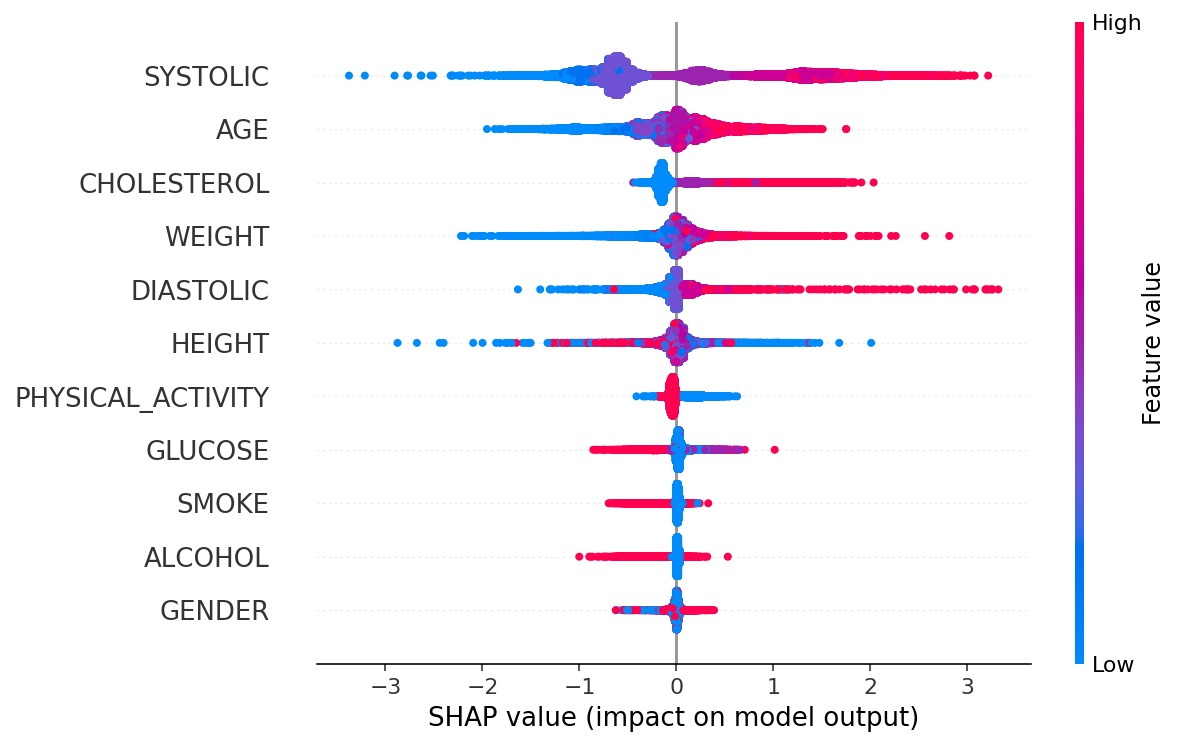

In [11]:
import shap

explainer = shap.TreeExplainer(xgb_model)
Xd = DMatrix(cardio_xtrain, label=cardio_ytrain)
shap_values = explainer.shap_values(Xd)
cardio_xtrain_df = pd.DataFrame(cardio_xtrain, columns=cardio_data.columns[:-1])
shap.summary_plot(shap_values, cardio_xtrain_df)